In [ ]:
!pip install tensorflow

import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from sklearn.model_selection import train_test_split

def load_imdb_data(data_dir):
    texts, labels = [], []
    for label_type in ['pos', 'neg']:
        dir_path = os.path.join(data_dir, label_type)
        for fname in os.listdir(dir_path):
            if fname.endswith(".txt"):
                with open(os.path.join(dir_path, fname), encoding="utf8") as f:
                    texts.append(f.read())
                labels.append(1 if label_type == 'pos' else 0)
    return texts, labels

imdb_dir = 'aclImdb_v1/aclImdb'  

train_texts, train_labels = load_imdb_data(os.path.join(imdb_dir, 'train'))

print(f"Loaded {len(train_texts)} training reviews.")
print("First review preview:", train_texts[0][:300])  


train_texts, train_labels = load_imdb_data(os.path.join(imdb_dir, 'train'))
test_texts, test_labels = load_imdb_data(os.path.join(imdb_dir, 'test'))

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_texts)

X_train = tokenizer.texts_to_sequences(train_texts)
X_test = tokenizer.texts_to_sequences(test_texts)

X_train = pad_sequences(X_train, maxlen=200)
X_test = pad_sequences(X_test, maxlen=200)

y_train = np.array(train_labels)
y_test = np.array(test_labels)

model = Sequential()
model.add(Embedding(10000, 32, input_length=200))
model.add(SimpleRNN(32))  
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.4f}")

sample_texts = [
    "This movie was fantastic! I loved it.",
    "Worst movie ever. Waste of time."
]
sample_sequences = tokenizer.texts_to_sequences(sample_texts)
sample_padded = pad_sequences(sample_sequences, maxlen=200)
predictions = model.predict(sample_padded)

for i, text in enumerate(sample_texts):
    sentiment = "Positive" if predictions[i] > 0.5 else "Negative"
    print(f"Review: {text}\nPrediction: {sentiment} ({predictions[i][0]:.4f})\n")


Loaded 25000 training reviews.
First review preview: Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High's satire is much closer to reality than is "Teachers". The scramble to survive financially, the insigh


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - accuracy: 0.6383 - loss: 0.6432 - val_accuracy: 0.6054 - val_loss: 0.7015
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.8439 - loss: 0.3656 - val_accuracy: 0.8182 - val_loss: 0.4438
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.9315 - loss: 0.1840 - val_accuracy: 0.8158 - val_loss: 0.4299
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.9705 - loss: 0.0996 - val_accuracy: 0.7656 - val_loss: 0.6123
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.9917 - loss: 0.0347 - val_accuracy: 0.7472 - val_loss: 0.8500
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8605 - loss: 0.4249
Test Accuracy: 0.8126
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
Review: This movie was fantastic! I loved it.
Prediction: Positive (0.9980)

Review: Worst movie ever. Waste of time.
Prediction: Negative (0.0213)



🔹 Louvain Community Detection
Community 0: ['A', 'B', 'C']
Community 2: ['G', 'H', 'I']
Community 1: ['D', 'E', 'F']


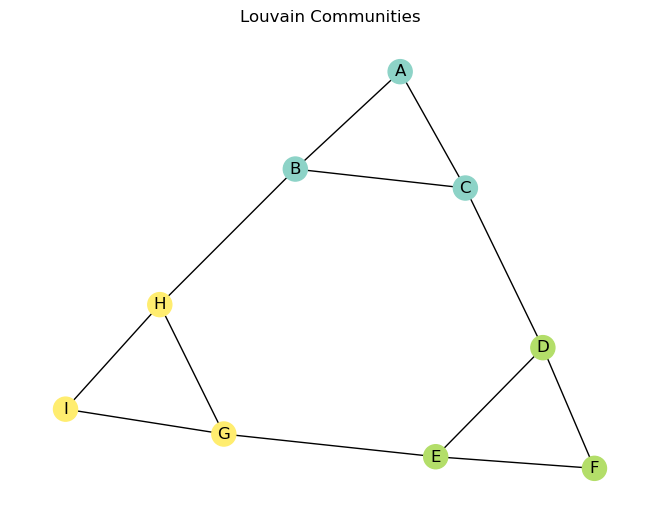


🔹 Greedy Modularity Community Detection
Community 0: ['A', 'B', 'C']
Community 1: ['G', 'H', 'I']
Community 2: ['D', 'E', 'F']


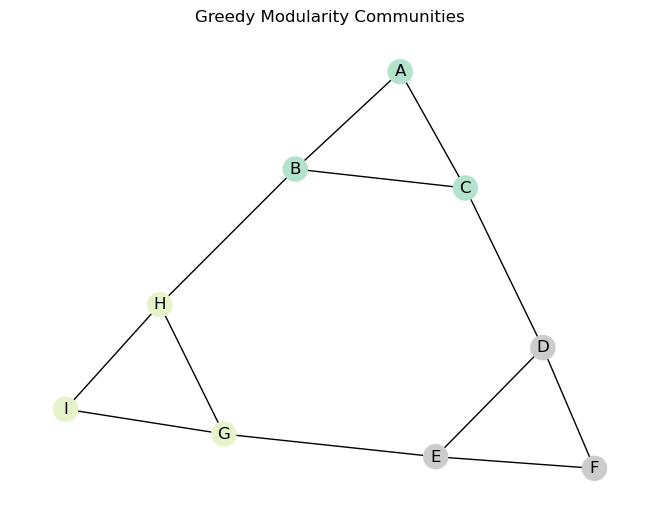

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import greedy_modularity_communities
import community.community_louvain as community_louvain

G = nx.Graph()
edges = [
    ('A', 'B'), ('A', 'C'),
    ('B', 'C'), ('B', 'H'),
    ('C', 'D'), ('H', 'I'),
    ('H', 'G'), ('G', 'I'),
    ('G', 'E'), ('E', 'D'),
    ('E', 'F'), ('D', 'F')
]
G.add_edges_from(edges)

pos = nx.spring_layout(G, seed=47)

print("🔹 Louvain Community Detection")
partition = community_louvain.best_partition(G, random_state=42)

communities_louvain = {}
for node, comm in partition.items():
    communities_louvain.setdefault(comm, []).append(node)

for i, members in communities_louvain.items():
    print(f"Community {i}: {sorted(members)}")

colors = [partition[node] for node in G.nodes()]
nx.draw(G, pos, node_color=colors, with_labels=True, cmap=plt.cm.Set3)
plt.title("Louvain Communities")
plt.show()

print("\n🔹 Greedy Modularity Community Detection")
greedy_comms = list(greedy_modularity_communities(G))

for i, comm in enumerate(greedy_comms):
    print(f"Community {i}: {sorted(comm)}")

node_to_comm = {node: i for i, comm in enumerate(greedy_comms) for node in comm}
colors = [node_to_comm[node] for node in G.nodes()]
nx.draw(G, pos, node_color=colors, with_labels=True, cmap=plt.cm.Pastel2)
plt.title("Greedy Modularity Communities")
plt.show()
